In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/floor/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().floor(fpath='../data/floor.mat')

X.shape =  (6177, 42)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=3, max_iter0=20, to_tear=False,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'jet', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 1544 points processed...
A_k, Atilde_k: 3088 points processed...
A_k, Atilde_k: 4632 points processed...
A_k, Atilde_k: 6176 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 1544 points processed...
local_param: 3088 points processed...
local_param: 4632 points processed...
local_param: 6176 points processed...
local_param: all 6177 points processed...
After iter 1, max distortion is 39.619766
After iter 2, max distortion is 34.378221
After iter 3, max distortion is 25.834033
After iter 4, max distortion is 25.834033
After iter 5, max distortion is 25.834033
After iter 6, max distortion is 25.834033
Max local distortion = 25.83403349049279
###############
Took 35.5 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-empty views

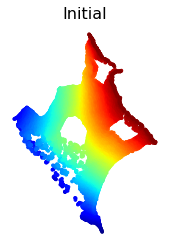

###############
Took 7.4 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.002895464017522295


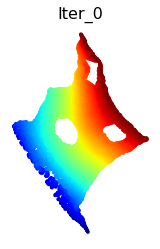

Iteration: 1
error: 0.0022891969496697602
Iteration: 2
error: 0.0018735023623893943
Iteration: 3
error: 0.0016291179079619142
Iteration: 4
error: 0.0014866353904470543
Iteration: 5
error: 0.0014045854033082486


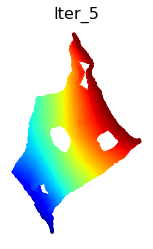

Iteration: 6
error: 0.0013536651935713514
Iteration: 7
error: 0.001318836332884559
Iteration: 8
error: 0.0012180634176336815
Iteration: 9
error: 0.0011843300539949096
Iteration: 10
error: 0.0011612888639592268


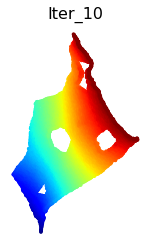

Iteration: 11
error: 0.001143017610646585
Iteration: 12
error: 0.0011285896070168495
Iteration: 13
error: 0.0011161270211556293
Iteration: 14
error: 0.0011054357456911055
Iteration: 15
error: 0.0010929648897900547


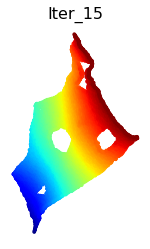

Iteration: 16
error: 0.0010844491871577627
Iteration: 17
error: 0.0010767211657559802
Iteration: 18
error: 0.0010696355965652362
Iteration: 19
error: 0.0010632472392019428


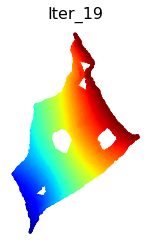

###############
Took 496.9 seconds to refine global embedding.
###############
###############
Took 508.6 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [9]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=25, n_components=2, n_jobs=-1, random_state=42)

In [10]:
y_ltsa = ltsa_obj.fit_transform(X)

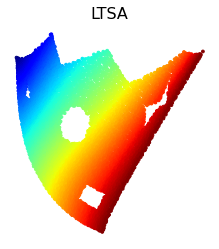

In [20]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA')

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [13]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.5, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [14]:
y_umap = umap_obj.fit_transform(X)

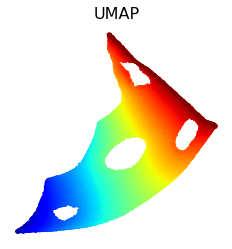

In [21]:
vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP')

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [17]:
tsne_obj = TSNE(perplexity=50, early_exaggeration=6, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [18]:
y_tsne = tsne_obj.fit_transform(X)

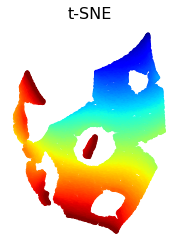

In [22]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE')